# Description of dataset
This dataset of electric cars from ev-database.org lists electric cars from around the world, their features, and their prices in both Germany and the UK. There are 11 columns and 180 rows of observations.

# Data exploration plan
1. Clean data and perform EDA
2. Rank cars based on variables (Range, Efficiency, Battery Size, Top speed, charge speed)
3. Statistics and hypothesis testing
4. Regression model

## 1. Cleaning and Exploring the data

In [2]:
#loading packages

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

pd.set_option("display.max_colwidth",500)
pd.set_option("display.max_rows",500)


In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
cars = pd.read_csv('../EV Data analysis/archive/Cheapestelectriccars-EVDatabase.csv')
cars.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [6]:
cars.shape

(180, 11)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


In [8]:
cars.describe()

,NumberofSeats
count,180.000000
mean,5.166667
std,0.971666
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,7.000000


Text(0.5, 1.0, 'Total Missing Values')

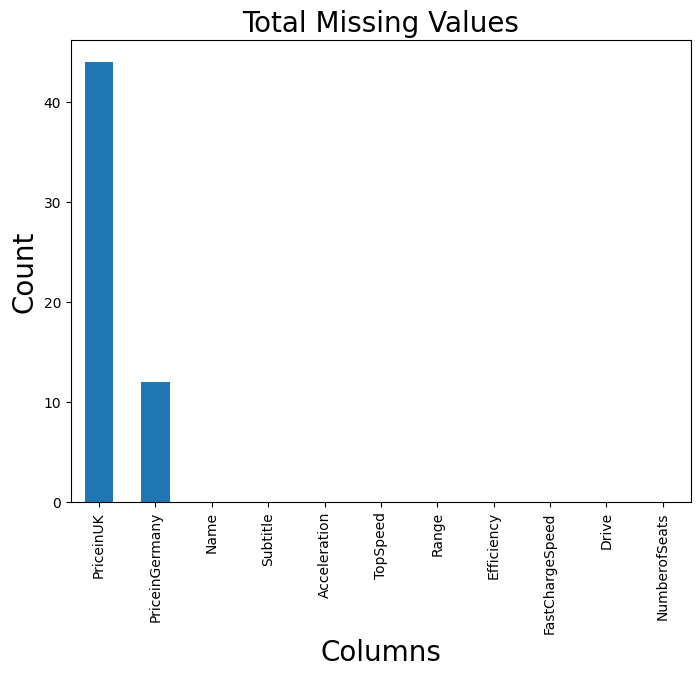

In [9]:
   #finding and filling in NA's
total = cars.isnull().sum().sort_values(ascending = False)
total_select = total.head(11)
total_select.plot(kind='bar', figsize = (8,6), fontsize =10)

plt.xlabel('Columns', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Total Missing Values', fontsize=20)